# Lab 3 Report

Keith DuCharme, Zhongyi Dai, Isaac Dowd

In [2]:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy.io import wavfile as wav
from scipy import signal as sig
import simpleaudio as sa
import decimal

## Summary

Lab 3 teaches us how to build convolution integrals in Python. This is useful for making a program act like an LTI system.

## Assignment 1 - Convolving Signals

In [4]:
def u(t):
    return 1 * (t >= 0)

<IPython.core.display.Javascript object>


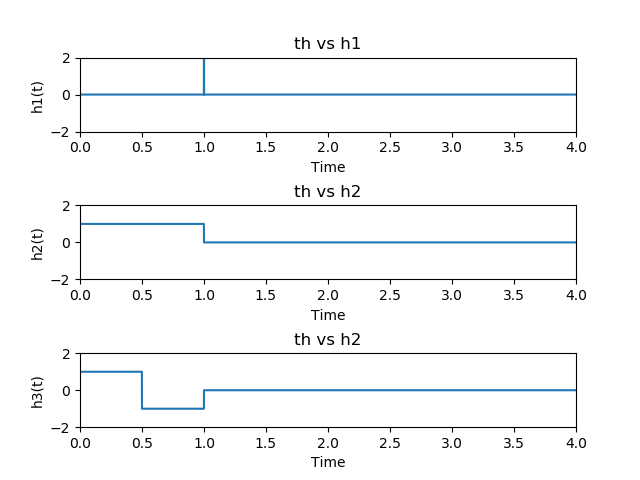

<IPython.core.display.Javascript object>


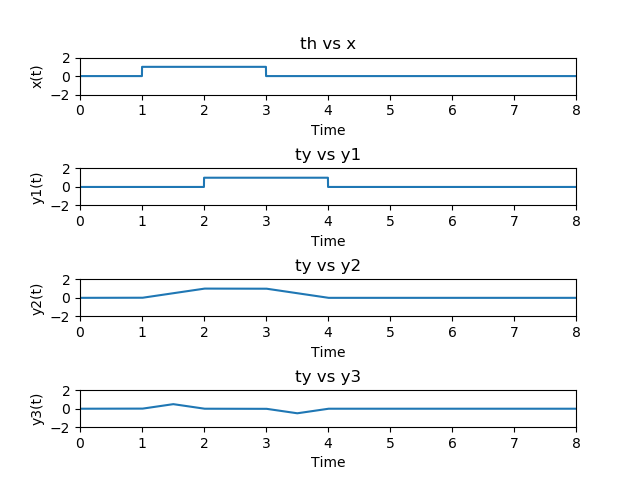

(0, 8)

In [25]:
#Assignment 1 - Convolving Signals

#Part A

fs = 1000
t = np.arange(0, 4.000001, 1/fs)
x = u(t-1) - u(t-3)

h1 = np.zeros(len(t))
h1[fs] = fs

h2 = u(t) - u(t-1)

h3 = (u(t) - u(t-0.5) - (u(t-0.5)- u(t-1)))

#Part B

th = t

fig1=plt.figure(1)
fig1.subplots_adjust(hspace=1, wspace=1)

plt.subplot(3,1,1)
plt.plot(th, h1)
plt.ylabel('h1(t)')
plt.xlabel('Time')
plt.title('th vs h1')
plt.ylim(-2, 2)
plt.xlim(0, 4)


plt.subplot(3,1,2)
plt.plot(th, h2)
plt.ylabel('h2(t)')
plt.xlabel('Time')
plt.title('th vs h2')
plt.ylim(-2, 2)
plt.xlim(0, 4)


plt.subplot(3,1,3)
plt.plot(th, h3)
plt.ylabel('h3(t)')
plt.xlabel('Time')
plt.title('th vs h2')
plt.ylim(-2, 2)
plt.xlim(0, 4)

#Part C

y1 = np.convolve(x, h1)/fs
y2 = np.convolve(x, h2)/fs
y3 = np.convolve(x, h3)/fs

#Part D

ty = np.arange(0, 8.000001, 1/fs)
x = np.concatenate([x, np.zeros(8001 - len(x))])

fig2=plt.figure(2)
fig2.subplots_adjust(hspace=2, wspace=1)

plt.subplot(4,1,1)
plt.plot(ty, x)
plt.ylabel('x(t)')
plt.xlabel('Time')
plt.title('th vs x')
plt.ylim(-2, 2)
plt.xlim(0, 8)

plt.subplot(4,1,2)
plt.plot(ty, y1)
plt.ylabel('y1(t)')
plt.xlabel('Time')
plt.title('ty vs y1')
plt.ylim(-2, 2)
plt.xlim(0, 8)

plt.subplot(4,1,3)
plt.plot(ty, y2)
plt.ylabel('y2(t)')
plt.xlabel('Time')
plt.title('ty vs y2')
plt.ylim(-2, 2)
plt.xlim(0, 8)

plt.subplot(4,1,4)
plt.plot(ty, y3)
plt.ylabel('y3(t)')
plt.xlabel('Time')
plt.title('ty vs y3')
plt.ylim(-2, 2)
plt.xlim(0, 8)


### Discussion
If fs=10 was used instead of fs=1000, the rate at which h(i) changes is slowed down. On the plot, it would mean there is no distinct 'jump' from one value to the next.

If the input was havled, the overall max would go down after convolution. y2 would stay at its max value for only one moment (at t=2). y3 would still hit its max value at t=1.5, but then would immediate decrease to its minvalue of -1.

## Assignment 2 - Revisiting Time Delay Tranformation

32000
1.57228125
[0.00000000e+00 3.12500000e-05 6.25000000e-05 ... 1.99990625e+00
 1.99993750e+00 1.99996875e+00]
[0. 0. 0. ... 0. 0. 0.]
[0.00000000e+00 3.12500000e-05 6.25000000e-05 ... 3.57215625e+00
 3.57218750e+00 3.57221875e+00]


<IPython.core.display.Javascript object>


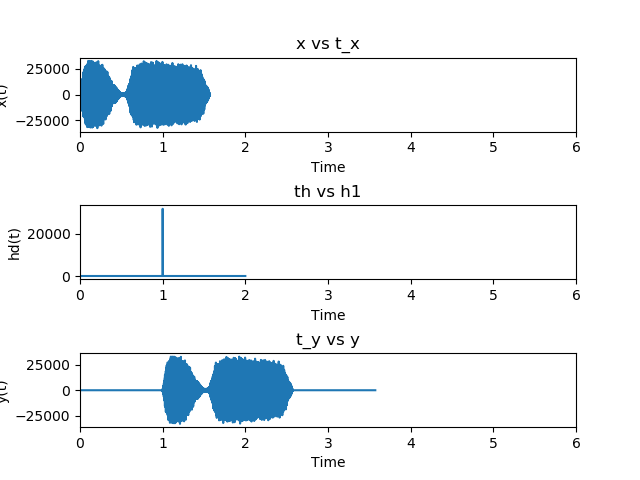

[-901 -943 -646 ...  330  169   45]


(0, 6)

In [26]:
#Assignment 2 - Revisiting Time Delay Transformation

#Part A

fs, x = wav.read('train32.wav')
t_x = np.arange(0, len(x), 1) / fs
print(fs)
print(len(x)/fs)
#Part B

hd = np.zeros(2 * fs)
hd[fs] = fs
t_h = np.arange(0, 2, 1/fs)
print(t_h)

#Part C

y = np.convolve(x, hd) / fs
print(y)
t_y = np.arange(0, len(y)) / fs

print(t_y)

fig1=plt.figure(3)
fig1.subplots_adjust(hspace=1, wspace=1)

print(x)
plt.subplot(3,1,1)
plt.plot(t_x, x)
plt.ylabel('x(t)')
plt.xlabel('Time')
plt.title('x vs t_x')
plt.xlim(0, 6)


plt.subplot(3,1,2)
plt.plot(t_h, hd)
plt.ylabel('hd(t)')
plt.xlabel('Time')
plt.title('th vs h1')
plt.xlim(0, 6)


plt.subplot(3,1,3)
plt.plot(t_y, y)
plt.ylabel('y(t)')
plt.xlabel('Time')
plt.title('t_y vs y')
plt.xlim(0, 6)


### Discussion
If we did not scale according to sampling time, the output would be very large, roughly 32000 times larger. Thus, the graph would fill a much larger y-axis (from 800,000,000 to -800,000,000). The sound would much, much louder, likely beyond the capability of our tiny laptop speakers.

## Assignment 3 - Audio File Realignment

In [28]:
#Assignment 3 - Audio File Realignment

#Part A

fs, x1 = wav.read('s2_1.wav')
fs, x2 = wav.read('s2_2.wav')
fs, x3 = wav.read('s2_3.wav')

#Part B

t_s = np.arange(0, 3, 1/fs)

h1 = np.zeros(3*fs)
h1[fs] = fs

h2 = np.zeros(3*fs)
h2[0] = 10 * fs

h3 = np.zeros(3*fs)
h3[2*fs] = fs

y1 = np.convolve(x1[:,0], h1) / fs
y2 = np.convolve(x2[:,0], h2) / fs
y3 = np.convolve(x3[:,0], h3) / fs

print(len(y1))
print(len(y2))
print(len(y3))

y1 = np.concatenate([y1, np.zeros(27648)])
y2 = np.concatenate([y2, np.zeros(27648)])

ytotal = y1 + y2 + y3
ytotal = np.int16(ytotal)

play1=sa.play_buffer(ytotal, 1, 2, fs)
play1.wait_done()

wav.write('I am your father.wav', fs, ytotal)


187595
187595
215243


### Discussion
If the x2 data was passed through all three filters, we would have the character saying "No" three times in a row, with the second being quite loud!

For sound file 2, the line comes from "Empire Strikes Back" and is spoken by Darth Vader.